**Logistic Regression for Binary Classification**

**Case Study**: A retail bank is going to float a stock trading facility for their existing customers. Generally, only about 10% of the customers do enough trades to be profitable. Company wants to figure out those customers to 
selectively offer them discount. 

Company rolled out this service to 10000+ of its customers and observed their trading behaviour for 6 months and then labelled them into two Revenue Grids 1 and 2. Using this data, now build a classification model which can be used to classify their remaining customers into these revenue grids.
- Revenue Grid 1 : Profitable customers
- Revenue Grid 2 : Not so Profitable 

**Logistic Regression from Scikit Learn**

Logistic Regression in scikit learn already contains penalties: l1 and l2.
1. l1 penalty is same as lasso penalty
2. l2 is same as ridge penalty


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, train_test_split

In [2]:
data_file=r'/Users/apple/Documents/Edvancer/Machine Learning in Python/Data/Data/Existing Base.csv'
bd=pd.read_csv(data_file)

In [3]:
bd.head()

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Revenue Grid,gender,region,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
0,1,Zero,51-55,Partner,Manual Worker,Secretarial/Admin,Own Home,"<17,500, >=15,000",No,No,...,19.99,0.00,0.00,1,Female,Wales,74.67,18.66,32.32,89.43
1,2,Zero,55-60,Single/Never Married,Retired,Retired,Own Home,"<27,500, >=25,000",No,No,...,0.00,0.00,0.00,2,Female,North West,20.19,0.00,4.33,22.78
2,3,Zero,26-30,Single/Never Married,Professional,Other,Own Home,"<30,000, >=27,500",Yes,No,...,0.00,3.49,0.00,2,Male,North,98.06,31.07,80.96,171.78
3,5,Zero,18-21,Single/Never Married,Professional,Manual Worker,Own Home,"<15,000, >=12,500",No,No,...,0.00,0.00,0.00,2,Female,West Midlands,4.10,14.15,17.57,-41.70
4,6,Zero,45-50,Partner,Business Manager,Unknown,Own Home,"<30,000, >=27,500",No,No,...,0.00,45.91,25.98,2,Female,Scotland,70.16,55.86,80.44,235.02


In [4]:
bd.shape

(10155, 32)

In [5]:
bd.dtypes

REF_NO                               int64
children                            object
age_band                            object
status                              object
occupation                          object
occupation_partner                  object
home_status                         object
family_income                       object
self_employed                       object
self_employed_partner               object
year_last_moved                      int64
TVarea                              object
post_code                           object
post_area                           object
Average Credit Card Transaction    float64
Balance Transfer                   float64
Term Deposit                       float64
Life Insurance                     float64
Medical Insurance                  float64
Average A/C Balance                float64
Personal Loan                      float64
Investment in Mutual Fund          float64
Investment Tax Saving Bond         float64
Home Loan  

**Variable Cleaning**

In [6]:
bd.describe()

,REF_NO,year_last_moved,Average Credit Card Transaction,Balance Transfer,Term Deposit,Life Insurance,Medical Insurance,Average A/C Balance,Personal Loan,Investment in Mutual Fund,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Revenue Grid,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
count,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000
mean,5770.830822,1968.376366,23.441757,46.417760,27.579851,66.242131,19.142050,32.084965,26.006003,42.339698,6.112071,4.482002,19.162772,1.893058,36.564886,21.698694,31.988647,90.460237
std,3324.837813,180.202242,50.872127,78.477609,53.952550,95.545316,32.451856,45.486614,84.275743,63.898899,12.833675,9.982641,89.666263,0.309055,42.270530,31.893841,39.106347,107.265475
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-78.430000
25%,2903.500000,1978.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,8.230000,4.670000,8.740000,26.605000
50%,5770.000000,1988.000000,0.000000,17.960000,0.000000,31.980000,0.510000,14.990000,0.000000,23.480000,0.000000,0.000000,0.000000,2.000000,23.980000,12.980000,21.340000,66.200000
75%,8665.500000,1994.000000,23.980000,65.385000,34.990000,94.390000,27.470000,46.480000,21.480000,59.555000,5.975000,4.490000,7.980000,2.000000,50.790000,28.300000,42.980000,125.935000
max,11518.000000,1999.000000,662.260000,2951.760000,784.820000,2930.410000,591.040000,626.240000,4905.930000,2561.270000,156.870000,162.350000,4306.420000,2.000000,1231.090000,1279.100000,1771.160000,4283.560000


In [10]:
#Checking missing values
bd.isnull().sum().sum()

0

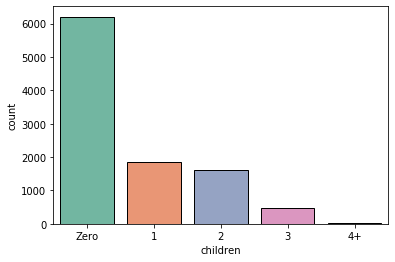

In [14]:
sns.countplot(bd['children'],palette="Set2",edgecolor='black')

In [15]:
#bd["children"].value_counts()

In [7]:
bd.loc[bd["children"]=="Zero", "children"]="0" #bd.loc[x,y]
bd.loc[bd["children"]=="4+","children"]="4"
bd["children"]=pd.to_numeric(bd["children"],errors="coerce")

bd['children'].dtype

dtype('int64')

In [10]:
bd["Revenue Grid"].value_counts() #int

2    9069
1    1086
Name: Revenue Grid, dtype: int64

In [11]:
bd["Grid"]=np.where(bd["Revenue Grid"]==2,0,1)
bd=bd.drop(["Revenue Grid"],1)

In [12]:
bd['age_band'].value_counts() #age_band: object

45-50      1359
36-40      1134
41-45      1112
31-35      1061
51-55      1052
55-60      1047
26-30       927
61-65       881
65-70       598
22-25       456
71+         410
18-21        63
Unknown      55
Name: age_band, dtype: int64

In [13]:
round(bd.groupby("age_band")["Grid"].mean(), 2) 
#age_band: If we treat it as categorical variable, we can combine its categories by looking average
#response rate across its categories.

age_band
18-21      0.17
22-25      0.11
26-30      0.11
31-35      0.11
36-40      0.13
41-45      0.11
45-50      0.10
51-55      0.10
55-60      0.11
61-65      0.09
65-70      0.10
71+        0.10
Unknown    0.05
Name: Grid, dtype: float64

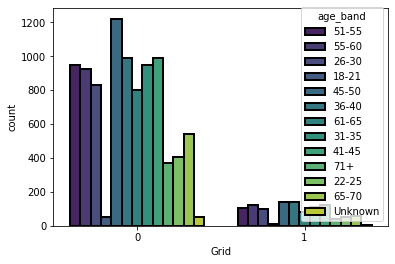

In [14]:
#sns.countplot(hue=bd['age_band'],x=bd['Grid'],palette='viridis',linewidth=2,edgecolor='black')

In [12]:
for i in range(len(bd)):
    if bd["age_band"][i] in ["71+","65-70","51-55","45-50"]: #0.10
        bd.loc[i,"age_band"]="ab_10"
    if bd["age_band"][i] in ["55-60","41-45","31-35","22-25","26-30"]: #0.11
        bd.loc[i,"age_band"]="ab_11"
    if bd["age_band"][i]=="36-40": #0.13
        bd.loc[i,"age_band"]="ab_13"
    if bd["age_band"][i]=="18-21": #0.17
        bd.loc[i,"age_band"]="ab_17"
    if bd["age_band"][i]=="61-65": #0.09
        bd.loc[i,"age_band"]="ab_9"

In [13]:
ab_dummies=pd.get_dummies(bd["age_band"])
ab_dummies.head()

,Unknown,ab_10,ab_11,ab_13,ab_17,ab_9
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,1,0,0,0,0


In [14]:
#We will add it back to the dataset, dropping the dummy for "Unknown"
bd=pd.concat([bd, ab_dummies], 1)
bd=bd.drop(["age_band", "Unknown"], 1)

In [10]:
round(bd.groupby("status")["Grid"].mean(), 2) 

status
Divorced/Separated      0.11
Partner                 0.11
Single/Never Married    0.11
Unknown                 0.06
Widowed                 0.09
Name: Grid, dtype: float64

In [15]:
bd["status"].value_counts() #objecta

Partner                 7709
Single/Never Married    1101
Divorced/Separated       679
Widowed                  618
Unknown                   48
Name: status, dtype: int64

In [16]:
status_dummies=pd.get_dummies(bd["status"])
status_dummies.head()

,Divorced/Separated,Partner,Single/Never Married,Unknown,Widowed
0,0,1,0,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,1,0,0,0


In [17]:
bd=pd.concat([bd, status_dummies], 1)
bd=bd.drop(["status", "Unknown", "Widowed"], 1)
#removed unknown as has low count, Removed widowed as we should removed one col when creating dummies

In [18]:
bd["occupation"].value_counts() #object

Professional         2449
Retired              2206
Secretarial/Admin    1797
Housewife            1255
Business Manager      732
Unknown               567
Manual Worker         556
Other                 537
Student                56
Name: occupation, dtype: int64

In [19]:
round(bd.groupby("occupation")["Grid"].mean(),2)

occupation
Business Manager     0.12
Housewife            0.09
Manual Worker        0.11
Other                0.11
Professional         0.12
Retired              0.10
Secretarial/Admin    0.11
Student              0.11
Unknown              0.11
Name: Grid, dtype: float64

In [20]:
for i in range(len(bd)):
    if bd["occupation"][i] in ["Unknown","Student","Secretarial/Admin","Other","Manual Worker"]:
        bd.loc[i,"occupation"]="oc_11"
    if bd["occupation"][i] in ["Professional","Business Manager"]:
        bd.loc[i,"occupation"]="oc_12"
    if bd["occupation"][i]=="Retired":
        bd.loc[i,"occupation"]="oc_10"
oc_dummies=pd.get_dummies(bd["occupation"])
oc_dummies.head()

,Housewife,oc_10,oc_11,oc_12
0,0,0,1,0
1,0,1,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [21]:
bd=pd.concat([bd,oc_dummies],1)
bd=bd.drop(["occupation","Housewife"],1)

In [22]:
bd["occupation_partner"].value_counts() #object

Unknown              2394
Professional         2051
Retired              1936
Manual Worker        1508
Business Manager      737
Secretarial/Admin     662
Housewife             527
Other                 324
Student                16
Name: occupation_partner, dtype: int64

In [23]:
round(bd.groupby("occupation_partner")["Grid"].mean(),2)

occupation_partner
Business Manager     0.11
Housewife            0.11
Manual Worker        0.11
Other                0.10
Professional         0.11
Retired              0.10
Secretarial/Admin    0.12
Student              0.12
Unknown              0.10
Name: Grid, dtype: float64

In [24]:
bd["ocp_10"]=0
bd["ocp_12"]=0
for i in range(len(bd)):
    if bd["occupation_partner"][i] in ["Unknown","Retired","Other"]:
        bd.loc[i,"ocp_10"]=1
    if bd["occupation_partner"][i] in ["Student","Secretarial/Admin"]:
        bd.loc[i,"ocp_12"]=1
        
bd=bd.drop(["occupation_partner"],1)

In [25]:
bd["TVarea"].value_counts()

Central          1618
Carlton          1541
Meridian         1226
Yorkshire        1042
Granada          1039
HTV               845
Anglia            751
Tyne Tees         536
Scottish TV       520
TV South West     363
Grampian          227
Unknown           189
Ulster            159
Border             99
Name: TVarea, dtype: int64

In [26]:
round(bd.groupby("TVarea")["Grid"].mean(),2)

TVarea
Anglia           0.11
Border           0.14
Carlton          0.11
Central          0.11
Grampian         0.10
Granada          0.12
HTV              0.10
Meridian         0.09
Scottish TV      0.11
TV South West    0.09
Tyne Tees        0.09
Ulster           0.12
Unknown          0.12
Yorkshire        0.12
Name: Grid, dtype: float64

In [27]:
for i in range(len(bd)):
    if bd["TVarea"][i] in ["Anglia","Carlton","Central","Scottish TV"]:
        bd.loc[i,"TVarea"]="oc_11"
    if bd["TVarea"][i] in ["Granada","Ulster", "Unknown", "Yorkshire"]:
        bd.loc[i,"TVarea"]="oc_12"
    if bd["TVarea"][i] in ["Meridian", "TV South West", "Tyne Tees"]:
        bd.loc[i,"TVarea"]="oc_9"
    if bd['TVarea'][i] in ['Grampian', 'HTV']:
        bd.loc[i, 'TVarea']='oc_10'
TVArea_dummies=pd.get_dummies(bd["TVarea"])
TVArea_dummies.head()

,Border,oc_10,oc_11,oc_12,oc_9
0,0,1,0,0,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,1,0,0


In [28]:
bd=pd.concat([bd, TVArea_dummies],1)
bd=bd.drop(["TVarea", "Border"], 1)

In [29]:
bd["region"].value_counts()

South East          2100
North West          1896
Unknown             1080
South West           971
West Midlands        820
Scotland             787
East Midlands        771
North                571
Wales                556
East Anglia          423
Northern Ireland     159
Isle of Man           16
Channel Islands        5
Name: region, dtype: int64

In [30]:
round(bd.groupby("region")["Grid"].mean(),2)

region
Channel Islands     0.20
East Anglia         0.13
East Midlands       0.10
Isle of Man         0.00
North               0.10
North West          0.11
Northern Ireland    0.12
Scotland            0.11
South East          0.10
South West          0.09
Unknown             0.12
Wales               0.11
West Midlands       0.11
Name: Grid, dtype: float64

In [31]:
for i in range(len(bd)):
    if bd["region"][i] in ["West Midlands","Wales","Scotland","North West"]:
        bd.loc[i,"region"]="oc_11"
    if bd["region"][i] in ["South East","North", "East Midlands"]:
        bd.loc[i,"region"]="oc_10"
    if bd["region"][i] in ["Unknown", "Northern Ireland"]:
        bd.loc[i,"region"]="oc_12"
    if bd["region"][i] in ["South West"]:
        bd.loc[i,"region"]="oc_09"

Region_dummies=pd.get_dummies(bd["region"])
Region_dummies.head()

,Channel Islands,East Anglia,Isle of Man,oc_09,oc_10,oc_11,oc_12
0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0


In [32]:
bd=pd.concat([bd, Region_dummies], 1)
bd=bd.drop(["region", "Channel Islands", "East Anglia", "Isle of Man"], 1)

In [33]:
bd=bd.drop(["post_area", "post_code", 'REF_NO'],1)

In [34]:
bd["home_status"].value_counts()

Own Home                9413
Rent from Council/HA     322
Rent Privately           261
Live in Parental Hom     109
Unclassified              50
Name: home_status, dtype: int64

In [35]:
bd["hs_own"]=np.where(bd["home_status"]=="Own Home",1,0)
del bd["home_status"]

In [36]:
bd["gender"].value_counts()

Female     7634
Male       2486
Unknown      35
Name: gender, dtype: int64

In [37]:
bd["gender_f"]=np.where(bd["gender"]=="Female",1,0)
del bd["gender"]

In [38]:
bd["self_employed"].value_counts()

No     9436
Yes     719
Name: self_employed, dtype: int64

In [39]:
bd["semp_yes"]=np.where(bd["self_employed"]=="Yes",1,0)
del bd["self_employed"]

In [40]:
bd["self_employed_partner"].value_counts()

No     9026
Yes    1129
Name: self_employed_partner, dtype: int64

In [41]:
bd["semp_part_yes"]=np.where(bd["self_employed_partner"]=="Yes",1,0)
del bd["self_employed_partner"]

In [42]:
bd["family_income"].value_counts() #object

>=35,000             2517
<27,500, >=25,000    1227
<30,000, >=27,500     994
<25,000, >=22,500     833
<20,000, >=17,500     683
<12,500, >=10,000     677
<17,500, >=15,000     634
<15,000, >=12,500     629
<22,500, >=20,000     590
<10,000, >= 8,000     563
< 8,000, >= 4,000     402
< 4,000               278
Unknown               128
Name: family_income, dtype: int64

In [43]:
round(bd.groupby("family_income")["Grid"].mean(),4)

family_income
< 4,000              0.0755
< 8,000, >= 4,000    0.0796
<10,000, >= 8,000    0.1066
<12,500, >=10,000    0.1019
<15,000, >=12,500    0.1113
<17,500, >=15,000    0.1230
<20,000, >=17,500    0.1113
<22,500, >=20,000    0.1186
<25,000, >=22,500    0.1032
<27,500, >=25,000    0.0970
<30,000, >=27,500    0.1157
>=35,000             0.1116
Unknown              0.0703
Name: Grid, dtype: float64

In [44]:
bd["fi"]=4 # by doing this, we have essentially clubbed <4000 and Unknown values
#taken average value in the range
bd.loc[bd["family_income"]=="< 8,000, >= 4,000","fi"]=6
bd.loc[bd["family_income"]=="<10,000, >= 8,000","fi"]=9
bd.loc[bd["family_income"]=="<12,500, >=10,000","fi"]=11.25
bd.loc[bd["family_income"]=="<15,000, >=12,500","fi"]=13.75
bd.loc[bd["family_income"]=="<17,500, >=15,000","fi"]=16.25
bd.loc[bd["family_income"]=="<20,000, >=17,500","fi"]=18.75
bd.loc[bd["family_income"]=="<22,500, >=20,000","fi"]=21.25
bd.loc[bd["family_income"]=="<25,000, >=22,500","fi"]=23.75
bd.loc[bd["family_income"]=="<27,500, >=25,000","fi"]=26.25
bd.loc[bd["family_income"]=="<30,000, >=27,500","fi"]=28.75
bd.loc[bd["family_income"]==">=35,000","fi"]=35
bd=bd.drop(["family_income"],1)
bd['fi'].dtype

dtype('float64')

In [45]:
bd.dtypes 
#Entire data is of numeric type

children                             int64
year_last_moved                      int64
Average Credit Card Transaction    float64
Balance Transfer                   float64
Term Deposit                       float64
Life Insurance                     float64
Medical Insurance                  float64
Average A/C Balance                float64
Personal Loan                      float64
Investment in Mutual Fund          float64
Investment Tax Saving Bond         float64
Home Loan                          float64
Online Purchase Amount             float64
Investment in Commudity            float64
Investment in Equity               float64
Investment in Derivative           float64
Portfolio Balance                  float64
Grid                                 int64
ab_10                                uint8
ab_11                                uint8
ab_13                                uint8
ab_17                                uint8
ab_9                                 uint8
Divorced/Se

**Removing NAs from the data**

In [46]:
bd.shape

(10155, 44)

In [47]:
bd.dropna(axis=0,inplace=True)
bd.shape

(10155, 44)

***Splitting into Train and Test data***

In [48]:
bd_train, bd_test = train_test_split(bd, test_size = 0.2,random_state=2)

In [49]:
x_train=bd_train.drop(["Grid"],1)
y_train=bd_train["Grid"]
x_test=bd_test.drop(["Grid"],1)
y_test=bd_test["Grid"]

In [50]:
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
logr=LogisticRegression(C=1, penalty="l2",class_weight="balanced",random_state=2)

In [52]:
logr.fit(x_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=2, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
logr.score(x_train, y_train) #accuracy score on train data #model classified 91% of the observations correctly

0.9108813392417529

In [54]:
# score model performance on the test data
roc_auc_score(y_test,logr.predict(x_test))

0.8937255415447861

***Finding the intercept and coefficients***

In [55]:
logr.intercept_

array([-2.42328382])

In [56]:
logr.coef_

array([[ 4.59790580e-02, -1.25604828e-04,  2.00773091e-02,
        -8.12941433e-03, -2.16829873e-02,  2.50347093e-03,
        -2.22754151e-02, -1.44091732e-02, -4.37574025e-02,
        -1.25627887e-02,  7.87554101e-02, -8.22664699e-02,
         5.30692082e-02,  1.50244948e-02,  1.89071993e-02,
         5.55929270e-02, -1.19013926e-04, -3.79623976e-01,
        -6.25931453e-01, -4.91189217e-01,  5.83574678e-02,
        -4.72432427e-01,  2.44722106e-01,  3.49862879e-01,
         2.76612931e-01, -1.12958675e-01,  1.34811832e-01,
         1.03384688e-01,  1.39562552e-02,  8.52684448e-02,
        -1.82538342e-01,  1.51832049e-01,  2.87103191e-01,
         4.03835891e-02,  1.71099709e-01, -1.86228406e-01,
        -2.02475418e-02, -6.81347558e-02,  1.81412684e-01,
        -3.14282364e-01,  7.83814499e-02,  2.61274812e-01,
         4.05369294e-03]])

In [57]:
logr.coef_.shape

(1, 43)

In [58]:
bd.shape #bd also has Grid which needs to be removed

(10155, 44)

In [59]:
bd.columns.values

array(['children', 'year_last_moved', 'Average Credit Card Transaction',
       'Balance Transfer', 'Term Deposit', 'Life Insurance',
       'Medical Insurance', 'Average A/C Balance', 'Personal Loan',
       'Investment in Mutual Fund', 'Investment Tax Saving Bond',
       'Home Loan', 'Online Purchase Amount', 'Investment in Commudity',
       'Investment in Equity', 'Investment in Derivative',
       'Portfolio Balance', 'Grid', 'ab_10', 'ab_11', 'ab_13', 'ab_17',
       'ab_9', 'Divorced/Separated', 'Partner', 'Single/Never Married',
       'oc_10', 'oc_11', 'oc_12', 'ocp_10', 'ocp_12', 'oc_10', 'oc_11',
       'oc_12', 'oc_9', 'oc_09', 'oc_10', 'oc_11', 'oc_12', 'hs_own',
       'gender_f', 'semp_yes', 'semp_part_yes', 'fi'], dtype=object)

In [60]:
Features = bd.columns.values #Features is a numpy ndarray object hence drop doesnt work here. We instead use np.delete
Features_new = np.delete(Features, np.where(Features =='Grid'))
Features_new

array(['children', 'year_last_moved', 'Average Credit Card Transaction',
       'Balance Transfer', 'Term Deposit', 'Life Insurance',
       'Medical Insurance', 'Average A/C Balance', 'Personal Loan',
       'Investment in Mutual Fund', 'Investment Tax Saving Bond',
       'Home Loan', 'Online Purchase Amount', 'Investment in Commudity',
       'Investment in Equity', 'Investment in Derivative',
       'Portfolio Balance', 'ab_10', 'ab_11', 'ab_13', 'ab_17', 'ab_9',
       'Divorced/Separated', 'Partner', 'Single/Never Married', 'oc_10',
       'oc_11', 'oc_12', 'ocp_10', 'ocp_12', 'oc_10', 'oc_11', 'oc_12',
       'oc_9', 'oc_09', 'oc_10', 'oc_11', 'oc_12', 'hs_own', 'gender_f',
       'semp_yes', 'semp_part_yes', 'fi'], dtype=object)

In [61]:
summary_table = pd.DataFrame(columns = ['Features'], data = Features_new)
summary_table['Coeff'] = np.transpose(logr.coef_) #by default ndarrays are rows and not cols
summary_table

,Features,Coeff
0,children,0.045979
1,year_last_moved,-0.000126
2,Average Credit Card Transaction,0.020077
3,Balance Transfer,-0.008129
4,Term Deposit,-0.021683
5,Life Insurance,0.002503
6,Medical Insurance,-0.022275
7,Average A/C Balance,-0.014409
8,Personal Loan,-0.043757
9,Investment in Mutual Fund,-0.012563


In [62]:
#Adding intercept in the table
summary_table.index = summary_table.index +1
summary_table.loc[0] = ['intercept', logr.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Features,Coeff
0,intercept,-2.423284
1,children,0.045979
2,year_last_moved,-0.000126
3,Average Credit Card Transaction,0.020077
4,Balance Transfer,-0.008129
5,Term Deposit,-0.021683
6,Life Insurance,0.002503
7,Medical Insurance,-0.022275
8,Average A/C Balance,-0.014409
9,Personal Loan,-0.043757


***Interpreting Coeff***

***Coeff ~ Weights, Intercept ~Bias***

In [63]:
summary_table = summary_table.sort_values('Coeff')
summary_table
# A feature is not important if Coeff is close to 0

,Features,Coeff
0,intercept,-2.423284
19,ab_11,-0.625931
20,ab_13,-0.491189
22,ab_9,-0.472432
18,ab_10,-0.379624
40,gender_f,-0.314282
36,oc_10,-0.186228
31,oc_10,-0.182538
26,oc_10,-0.112959
12,Home Loan,-0.082266


***Predicting Outcome***

In [64]:
predicted_proba = logr.predict_proba(x_test) #predicting prob of outcome of grid being 1 or 0
predicted_proba[:,1]

array([0.03820211, 0.07193547, 0.0655822 , ..., 0.83563602, 0.73016368,
       0.06206152])

In [65]:
#Saving the module
#Pickling: Process of converting the python object into a character stream. 
#Later when the module is needed we can unpickle it

**Prediction in 1 & 0s**
To arrive at the eventual 1,0 prediction, we need to find cutoff to convert predicted probabilites into two classes. Lets first get the probabilities out.

In [66]:
prob_score=pd.Series(list(zip(*logr.predict_proba(x_train)))[1])

In [67]:
cutoffs=np.linspace(0,1,100) #it always needs to be between 0 and 1. Step size can be changed

In [68]:
#For each of these cutoff, calculating TP,FP,TN,FN values and calculate KS.
#The best cutoff is chosen as the one having highest KS.
KS_cut=[]
for cutoff in cutoffs:
    predicted=pd.Series([0]*len(y_train))
    predicted[prob_score>cutoff]=1
    df=pd.DataFrame(list(zip(y_train,predicted)),columns=["real","predicted"])
    TP=len(df[(df["real"]==1) &(df["predicted"]==1) ])
    FP=len(df[(df["real"]==0) &(df["predicted"]==1) ])
    TN=len(df[(df["real"]==0) &(df["predicted"]==0) ])
    FN=len(df[(df["real"]==1) &(df["predicted"]==0) ])
    P=TP+FN
    N=TN+FP
    KS=(TP/P)-(FP/N)
    KS_cut.append(KS)

cutoff_data=pd.DataFrame(list(zip(cutoffs,KS_cut)),columns=["cutoff","KS"])

KS_cutoff=cutoff_data[cutoff_data["KS"]==cutoff_data["KS"].max()]["cutoff"]

In [69]:
#Now checking how this model with the cutoff determined above, performs on the test data.
# Performance on test data
prob_score_test=pd.Series(list(zip(*logr.predict_proba(x_test)))[1])

predicted_test=pd.Series([0]*len(y_test))
predicted_test[prob_score_test>float(KS_cutoff)]=1

df_test=pd.DataFrame(list(zip(y_test,predicted_test)),columns=["real","predicted"])

k=pd.crosstab(df_test['real'],df_test["predicted"])
print('confusion matrix :\n \n ',k)
TN=k.iloc[0,0]
TP=k.iloc[1,1]
FP=k.iloc[0,1]
FN=k.iloc[1,0]
P=TP+FN
N=TN+FP

confusion matrix :
 
  predicted     0    1
real                
0          1645  162
1            27  197


In [70]:
# Accuracy of test
(TP+TN)/(P+N)

0.9069423929098966

In [71]:
# Sensitivity on test
TP/P

0.8794642857142857

In [72]:
#Specificity on test
TN/N

0.9103486441615938

In [73]:
#Next we see how cutoff determined by F_beta score performs on test data for beta values : 0.5,1,2

# cutoffs=np.linspace(0.010,0.99,100)
# def Fbeta_perf(beta,cutoffs,y_train,prob_score):
#     FB_cut=[]
#     for cutoff in cutoffs:
#         predicted=pd.Series([0]*len(y_train))
#         predicted[prob_score>cutoff]=1
#         df=pd.DataFrame(list(zip(y_train,predicted)),columns=["real","predicted"])

#         TP=len(df[(df["real"]==1) &(df["predicted"]==1) ])
#         FP=len(df[(df["real"]==0) &(df["predicted"]==1) ])
#         FN=len(df[(df["real"]==1) &(df["predicted"]==0) ])
#         P=TP+FN
        
        
#         Precision=TP/(TP+FP)
#         Recall=TP/P
#         FB=(1+beta**2)*Precision*Recall/((beta**2)*Precision+Recall)
#         FB_cut.append(FB)

#     cutoff_data=pd.DataFrame(list(zip(cutoffs,FB_cut)),columns=["cutoff","FB"])

#     FB_cutoff=cutoff_data[cutoff_data["FB"]==cutoff_data["FB"].max()]["cutoff"]

#     prob_score_test=pd.Series(list(zip(*logr.predict_proba(x_test)))[1])

#     predicted_test=pd.Series([0]*len(y_test))
#     predicted_test[prob_score_test>float(FB_cutoff)]=1

#     df_test=pd.DataFrame(list(zip(y_test,predicted_test)),columns=["real","predicted"])

#     k=pd.crosstab(df_test['real'],df_test["predicted"])
# #     print('confusion matrix :\n \n ',k)
#     TN=k.iloc[0,0]
#     TP=k.iloc[1,1]
#     FP=k.iloc[0,1]
#     FN=k.iloc[1,0]
#     P=TP+FN
#     N=TN+FP
#     print('For beta :',beta)
#     print('Accuracy is :',(TP+TN)/(P+N))
#     print('Sensitivity is :',(TP/P))
#     print('Specificity is :',(TN/N))
#     print('\n \n \n')

In [74]:
#Fbeta_perf(0.5,cutoffs,y_train,prob_score)
#Fbeta_perf(1,cutoffs,y_train,prob_score)
#Fbeta_perf(2,cutoffs,y_train,prob_score)

In [75]:
#low beta < 1 favors Specificity where as beta > 1 favors sensitivity